## Logistic Regression Week 2

***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import sklearn

# import shap
# import statsmodels.api as sm

# import datetime
# from datetime import datetime, timedelta

# import scipy.stats

# import pandas_profiling
# from pandas_profiling import ProfileReport

#import graphviz

#import xgboost as xgb
#from xgboost import XGBClassifier, XGBRegressor
#from xgboost import to_graphviz, plot_importance

#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
#from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor
#from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)


#from sklearn.pipeline import Pipeline
#from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, f_regression, chi2

from sklearn.linear_model import LogisticRegression

from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


#from tpot import TPOTClassifier, TPOTRegressor
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

# import pickle
# from pickle import dump, load

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce


#from pycaret.classification import *
#from pycaret.clustering import *
#from pycaret.regression import *

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)


random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,insurance,fh,smoking,dm
0,1000,203.00,82,56.00,3.60,4.31,Buckingham,46,female,62.00,121.00,medium,118.00,59.00,nan,nan,29.00,38.00,720.00,1,0,3,no
1,1001,165.00,97,24.00,6.90,4.44,Buckingham,29,female,64.00,218.00,large,112.00,68.00,nan,nan,46.00,48.00,360.00,0,0,2,no
2,1002,228.00,92,37.00,6.20,4.64,Buckingham,58,female,61.00,256.00,large,190.00,92.00,185.00,92.00,49.00,57.00,180.00,2,0,2,no
3,1003,78.00,93,12.00,6.50,4.63,Buckingham,67,male,67.00,119.00,large,110.00,50.00,nan,nan,33.00,38.00,480.00,1,0,3,no
4,1005,249.00,90,28.00,8.90,7.72,Buckingham,64,male,68.00,183.00,medium,138.00,80.00,nan,nan,44.00,41.00,300.00,0,0,3,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,41506,296.00,369,46.00,6.40,16.11,Louisa,53,male,69.00,173.00,medium,138.00,94.00,130.00,94.00,35.00,39.00,210.00,2,0,1,yes
399,41507,284.00,89,54.00,5.30,4.39,Louisa,51,female,63.00,154.00,medium,140.00,100.00,146.00,102.00,32.00,43.00,180.00,2,0,3,no
400,41510,194.00,269,38.00,5.10,13.63,Louisa,29,female,69.00,167.00,small,120.00,70.00,nan,nan,33.00,40.00,20.00,0,1,2,yes
401,41752,199.00,76,52.00,3.80,4.49,Louisa,41,female,63.00,197.00,medium,120.00,78.00,nan,nan,41.00,48.00,255.00,2,0,2,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         403 non-null    int64  
 1   chol       402 non-null    float64
 2   stab.glu   403 non-null    int64  
 3   hdl        402 non-null    float64
 4   ratio      402 non-null    float64
 5   glyhb      390 non-null    float64
 6   location   403 non-null    object 
 7   age        403 non-null    int64  
 8   gender     403 non-null    object 
 9   height     398 non-null    float64
 10  weight     402 non-null    float64
 11  frame      391 non-null    object 
 12  bp.1s      398 non-null    float64
 13  bp.1d      398 non-null    float64
 14  bp.2s      141 non-null    float64
 15  bp.2d      141 non-null    float64
 16  waist      401 non-null    float64
 17  hip        401 non-null    float64
 18  time.ppn   400 non-null    float64
 19  insurance  403 non-null    int64  
 20  fh        

In [5]:
df.describe(include='all')

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,insurance,fh,smoking,dm
count,403.00,402.00,403.00,402.00,402.00,390.00,403,403.00,403,398.00,402.00,391,398.00,398.00,141.00,141.00,401.00,401.00,400.00,403.00,403.00,403.00,390
unique,nan,nan,nan,nan,nan,nan,2,nan,2,nan,nan,3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2
top,nan,nan,nan,nan,nan,nan,Louisa,nan,female,nan,nan,medium,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,no
freq,nan,nan,nan,nan,nan,nan,203,nan,234,nan,nan,184,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,330
mean,15978.31,207.85,106.67,50.45,4.52,5.59,NaN,46.85,NaN,66.02,177.59,NaN,136.90,83.32,152.38,92.52,37.90,43.04,341.25,1.05,0.19,1.85,NaN
std,11881.12,44.45,53.08,17.26,1.73,2.24,NaN,16.31,NaN,3.92,40.34,NaN,22.74,13.59,21.71,11.56,5.73,5.66,309.54,0.80,0.39,0.65,NaN
min,1000.00,78.00,48.00,12.00,1.50,2.68,NaN,19.00,NaN,52.00,99.00,NaN,90.00,48.00,110.00,60.00,26.00,30.00,5.00,0.00,0.00,1.00,NaN
25%,4792.50,179.00,81.00,38.00,3.20,4.38,NaN,34.00,NaN,63.00,151.00,NaN,121.25,75.00,138.00,84.00,33.00,39.00,90.00,0.00,0.00,1.00,NaN
50%,15766.00,204.00,89.00,46.00,4.20,4.84,NaN,45.00,NaN,66.00,172.50,NaN,136.00,82.00,149.00,92.00,37.00,42.00,240.00,1.00,0.00,2.00,NaN
75%,20336.00,230.00,106.00,59.00,5.40,5.60,NaN,60.00,NaN,69.00,200.00,NaN,146.75,90.00,161.00,100.00,41.00,46.00,517.50,2.00,0.00,2.00,NaN


In [6]:
df.shape

(403, 23)

In [7]:
df.columns

Index(['id', 'chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'location', 'age', 'gender', 'height', 'weight', 'frame', 'bp.1s', 'bp.1d', 'bp.2s', 'bp.2d', 'waist', 'hip', 'time.ppn', 'insurance', 'fh', 'smoking', 'dm'], dtype='object')

In [8]:
#what percentage of people from Buckingham have diabetes?

buck = df[df["location"] == "Buckingham"]

In [9]:
buck

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,insurance,fh,smoking,dm
0,1000,203.00,82,56.00,3.60,4.31,Buckingham,46,female,62.00,121.00,medium,118.00,59.00,nan,nan,29.00,38.00,720.00,1,0,3,no
1,1001,165.00,97,24.00,6.90,4.44,Buckingham,29,female,64.00,218.00,large,112.00,68.00,nan,nan,46.00,48.00,360.00,0,0,2,no
2,1002,228.00,92,37.00,6.20,4.64,Buckingham,58,female,61.00,256.00,large,190.00,92.00,185.00,92.00,49.00,57.00,180.00,2,0,2,no
3,1003,78.00,93,12.00,6.50,4.63,Buckingham,67,male,67.00,119.00,large,110.00,50.00,nan,nan,33.00,38.00,480.00,1,0,3,no
4,1005,249.00,90,28.00,8.90,7.72,Buckingham,64,male,68.00,183.00,medium,138.00,80.00,nan,nan,44.00,41.00,300.00,0,0,3,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,21255,231.00,84,91.00,2.50,4.90,Buckingham,33,male,69.00,163.00,small,140.00,70.00,nan,nan,35.00,38.00,150.00,0,0,2,no
330,21257,184.00,76,42.00,4.40,4.71,Buckingham,66,male,74.00,185.00,medium,130.00,75.00,nan,nan,40.00,41.00,180.00,1,0,2,no
331,21281,164.00,94,58.00,2.80,3.80,Buckingham,28,female,67.00,180.00,small,128.00,94.00,124.00,96.00,39.00,43.00,270.00,0,0,2,no
332,21284,134.00,101,36.00,3.70,4.67,Buckingham,25,female,63.00,245.00,NaN,142.00,78.00,141.00,80.00,47.00,58.00,10.00,2,0,1,no


In [10]:
buck["dm"].value_counts()

no     159
yes     31
Name: dm, dtype: int64

In [11]:
31/(31+159) * 100

16.315789473684212

Now fit a logistic regression with “location” as the predictor variable. What are the log odds of having diabetes being from Louisa compared with Buckingham?  Give the answer (the log odds ratio) to two decimal places.

## Data Preprocessing

In [12]:
df.columns

Index(['id', 'chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'location', 'age', 'gender', 'height', 'weight', 'frame', 'bp.1s', 'bp.1d', 'bp.2s', 'bp.2d', 'waist', 'hip', 'time.ppn', 'insurance', 'fh', 'smoking', 'dm'], dtype='object')

In [13]:
df1 = df[["location","dm"]]

In [14]:
df1

,location,dm
0,Buckingham,no
1,Buckingham,no
2,Buckingham,no
3,Buckingham,no
4,Buckingham,yes
...,...,...
398,Louisa,yes
399,Louisa,no
400,Louisa,yes
401,Louisa,no


In [15]:
diabetic = df1[df1["dm"] == "yes"]

In [16]:
diabetic.head()

,location,dm
4,Buckingham,yes
19,Buckingham,yes
22,Buckingham,yes
32,Buckingham,yes
39,Buckingham,yes


In [17]:
diabetic.location.value_counts()

Buckingham    31
Louisa        29
Name: location, dtype: int64

In [18]:
29/(31+29)

0.48333333333333334

### Treat Missing Values

In [19]:
df1.isnull().sum()

location     0
dm          13
dtype: int64

In [20]:
df1.dropna(inplace=True)

In [21]:
df1.isnull().sum()

location    0
dm          0
dtype: int64

In [22]:
diabetic = df1[df1["dm"] == "yes"]

In [23]:
diabetic.head()

,location,dm
4,Buckingham,yes
19,Buckingham,yes
22,Buckingham,yes
32,Buckingham,yes
39,Buckingham,yes


In [24]:
diabetic.location.value_counts()

Buckingham    31
Louisa        29
Name: location, dtype: int64

## Data Visualization

### Univariate Data Exploration

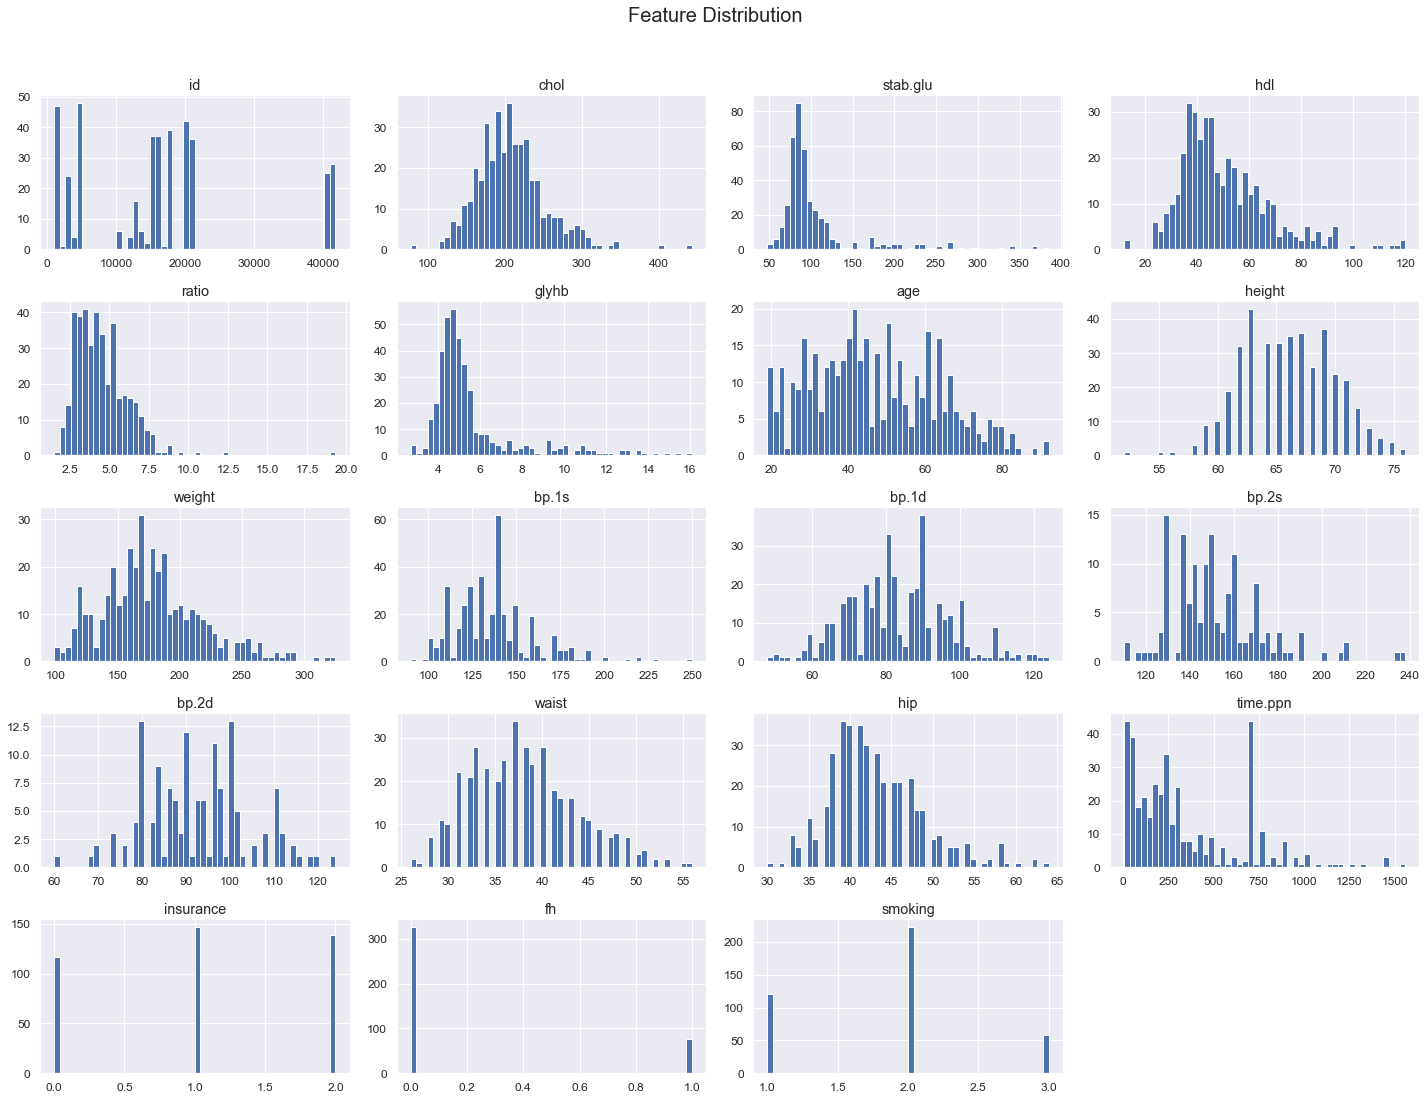

In [25]:
df.hist(bins=50, figsize=(20,15))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

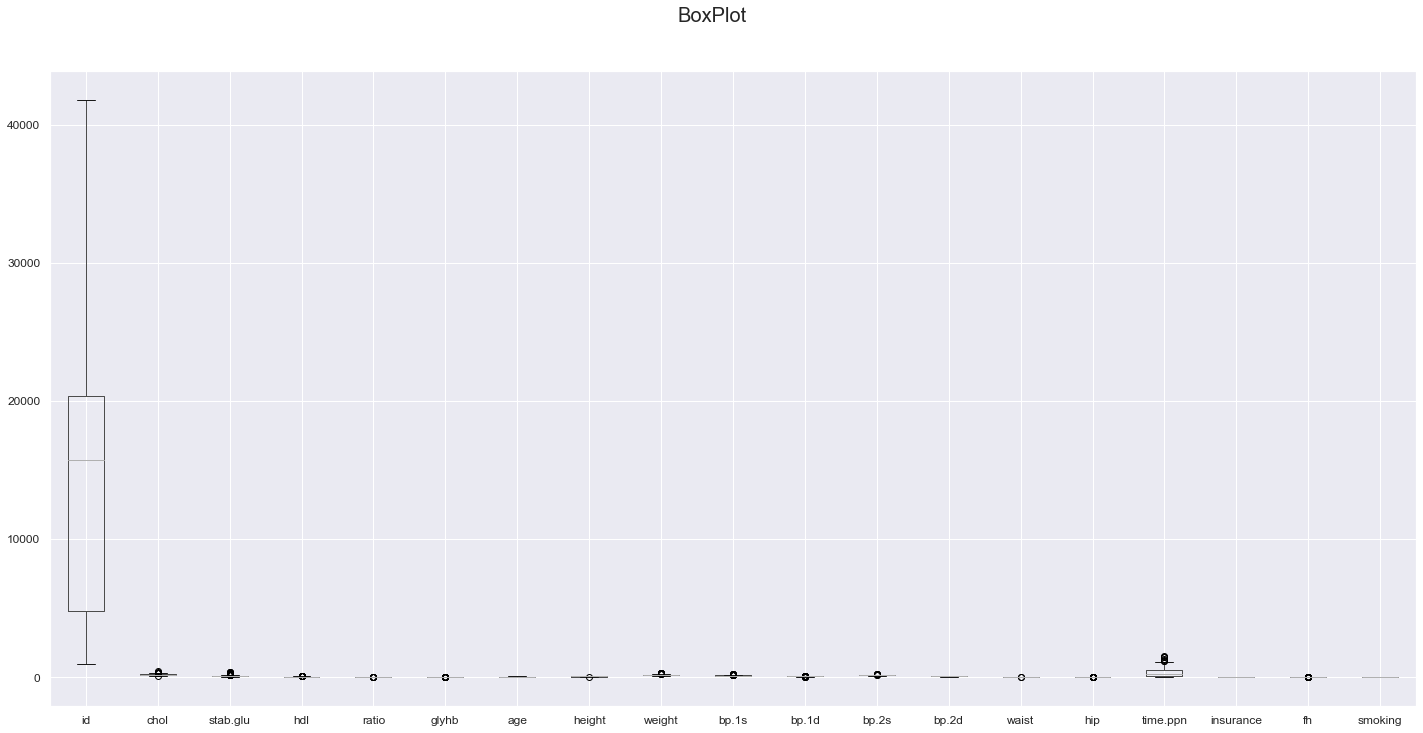

In [26]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

#### Python code done by Dennis Lam